# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [2]:
datestring = '201402'
getCitiBikeCSV(datestring)

file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [4]:
# df is the dataframe where the content of the csv file is stored
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df['date'] = pd.to_datetime(df['starttime'])
df['hour'] = df['date'].dt.hour

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

### **H0: there is no statistical difference in the trips duration for day and night riders**.
### $$ \alpha = 0.05 $$



In [5]:
#df_1 is the dataframe where only the content of tripduration and hour is stored
df_1=df[['tripduration','hour']]
df_1['day_duration'] = df_1['tripduration'][(df_1['hour'] > 5) & (df_1['hour'] <= 18)]
df_1['night_duration'] = df_1['tripduration'][  (df_1['hour'] <= 5)|(df_1['hour'] > 18)]
df_1['day_duration'].dropna(inplace= True)
df_1['night_duration'].dropna(inplace= True)
df_1.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,tripduration,hour,day_duration,night_duration
0,382,0,NaN,382.0
1,372,0,NaN,372.0
2,591,0,NaN,591.0
3,583,0,NaN,583.0
4,223,0,NaN,223.0


In [6]:
df_1.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,hour,day_duration,night_duration
count,224736.000000,224736.000000,179075.000000,45661.000000
mean,874.519810,13.990687,875.304319,871.443091
std,5486.092219,4.797254,5420.969543,5734.419746
min,60.000000,0.000000,60.000000,60.000000
25%,360.000000,10.000000,NaN,NaN
50%,544.000000,15.000000,NaN,NaN
75%,845.000000,18.000000,NaN,NaN
max,766108.000000,23.000000,766108.000000,509750.000000


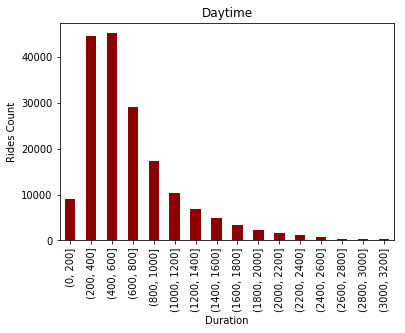

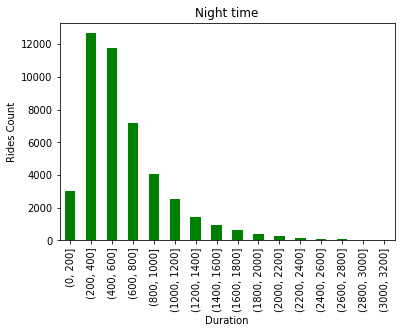

In [7]:
bins = np.arange(0, 3201, 200)
axD = df_1.day_duration.groupby(pd.cut(df_1.day_duration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                               legend=False,color = 'darkred')
axD.set_title("Daytime")
axN = df_1.night_duration.groupby(pd.cut(df_1.night_duration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                            legend=False,color = 'green')
axN.set_title("Night time");
axD.set_xlabel('Duration')
axD.set_ylabel('Rides Count')
axN.set_xlabel('Duration')
axN.set_ylabel('Rides Count')

**Figure 1: histogrammed distribution of riders'count by day and night**
From the figure, we can tell that the scale of riders counts for daytime is much larger than the scale of riders count for the night time, which indicates there are much more rides during the day than the night. The duration is split into 200 seconds bins. The two distributions have similar shapes, which both of daytime and night time have high rides counts in the 200-600 bins, and low riders counts after 2400.

                count_nonzero
night_duration               
(0, 200]             0.015334
(200, 400]           0.042985
(400, 600]           0.048049
(600, 800]           0.041822
(800, 1000]          0.034299
(1000, 1200]         0.031837
(1200, 1400]         0.024689
(1400, 1600]         0.018912
(1600, 1800]         0.013569
(1800, 2000]         0.009609
(2000, 2200]         0.006668
(2200, 2400]         0.003949
(2400, 2600]         0.002105
(2600, 2800]         0.001486
(2800, 3000]         0.000676
(3000, 3200]         0.000000


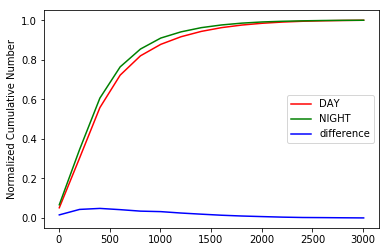

In [8]:
csD=df_1.day_duration.groupby(pd.cut(df_1.day_duration, bins)).agg([count_nonzero]).cumsum()

csN=df_1.night_duration.groupby(pd.cut(df_1.night_duration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csN / csN.max()-csD / csD.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "DAY",color = "red")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "NIGHT",color = "green")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference", color = "blue")
pl.xlabel("")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: The cumulative distribution of trip durations by day and night**  We can tell from the figure that the Normalized cumulative distributions for day and night are very similar, and their different gets to around 3% to 4%.

# KS tests with all data

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [9]:
ks = scipy.stats.ks_2samp(df_1.day_duration, df_1.night_duration)
print (ks)

Ks_2sampResult(statistic=0.05167568948751926, pvalue=6.3621211674812667e-85)


**  We reject the null hypothesis that there is no statistical difference in the trips duration for day and night riders because the p-value 0.00 is lower than the critical value 0.05.**

# KS test with a subset 200 times smaller

In [10]:
df_2 = df_1.sample(len(df_1)/200,random_state=22)
df_2['day_duration'].dropna(inplace= True)
df_2['night_duration'].dropna(inplace= True)
ks2 = scipy.stats.ks_2samp(df_2.day_duration, df_2.night_duration)
print (ks2)

Ks_2sampResult(statistic=0.034059892944977604, pvalue=0.98116674674764937)


#### We CAN NOT reject the null hypothesis that there is no statistical difference in the trips duration for day and night riders because the p-value 0.981 is greater than the critical value 0.05.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



### Null hypothesis: There is no linear relationship between the samples of day rides and night rides.
### $$ \alpha = 0.05 $$

In [11]:
# randomly choose 500 sample from each.
np.random.seed(23)
D = np.random.choice(df_1['day_duration'], 500, replace=False)
N = np.random.choice(df_1['night_duration'],500, replace=False)

pearson=scipy.stats.pearsonr(D,N)
#print(pearson)
print(" PearsonResult(r="+ str(pearson)[1:22]+", pvalue=" + str(pearson)[23:])

 PearsonResult(r=-0.051217336535688794, pvalue= 0.25298113300849923)


#### The Pearson correlation coefficent R value is -0.0512, representing a weak negative correlation. The Pearson p-value is 0.2529, which is greater than the critical value 0.05, so we CAN NOT reject the null hypothesis.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

### Null hypothesis: There is no linear relationship between the samples of day rides and night rides.
### $$ \alpha = 0.05 $$

In [12]:
#600 sample
np.random.seed(24)
D_a = np.random.choice(df_1['day_duration'], 600, replace=False)
N_b= np.random.choice(df_1['night_duration'],600, replace=False)
spearman = scipy.stats.spearmanr(D_a, N_b)

print(spearman)

SpearmanrResult(correlation=-0.024797206643390069, pvalue=0.54436096238728604)


#### The Spearman correlation is -0.0248, representing a weak negative correlation. The Spearman p-value is 0.5444, which is greater than the critical value 0.05, so we CAN NOT reject the null hypothesis.